<a href="https://colab.research.google.com/github/kursataker/cng562-machine-learning-spring-19/blob/master/Mathematical_Background.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculus

*Disclaimer.* Parts of this Jupyter notebook is taken verbatim from Wikipedia and MML.

**Ref.** MML, Chapter 5, Vector Calculus

## Derivative

The *derivative* $f'(t)$ is a measure of how fast the function $f(t)$ is changing at the point $t \in \mathbf{R}$. When $\mathbf{t} \in \mathbf{R}^D$, the gradient $\nabla f(\mathbf{t})$ measures the rate of change in $f(\mathbf{t})$ pointing in the direction in which increases the most.

### Example

Let $f(t) = 0$ when $x<0$ and $f(t)=t$ when $t\geq 0$. The function $f(t)$ is an example of an *activation function*, called a *Rectified Linear Unit (ReLu)* in ML literature.

Its derivative is $f'(t)=0$ when $t<0$ and $f'(t)=1$ when $t>0$. Note that $f(t)$ is not differentiable at $t=0$.

## Chain Rule

Chain rule governs the differentiation of composition of functions $f(t)$ and $g(t)$:

$$ (f \circ g)'(t) = \frac{d}{dt}f(g(t)) = f'(g(t)) \cdot g'(t).$$

The **Back-propagation algorithm for neural networks** is based on the *chain rule*.

### Example

Let $\sigma(t) = \frac{1}{1+e^{-t}}$. The function $\sigma(t)$ is another example of an *activation function* in ML literature, called the *sigmoid function* (or, *logistic function*).

Notice $\sigma(t) = (f \circ g)(t)$, where $f(t) = t^{-1}$ and $g(t)=1+e^{-t}$.
By Chain Rule, the derivative $\sigma'(t)$ is

$$\sigma'(t) = (-1) \cdot (g(t))^{-2} \cdot g'(t) = (-1) \frac{-e^{-t}}{(1+e^{-t})^{2}} = \frac{e^{-t}}{(1+e^{-t})^{2}}.$$

### Exercise

Please verify that $\sigma'(t) = \sigma(t)(1-\sigma(t)).$ This equation is called the *logistic equation*.

### Some properties of the logistic function

1. $\lim_{t \to - \infty} \sigma(t)=$____.
2. $\lim_{t \to \infty} \sigma(t)=$____.
3. At $t=0$, the value of the function $\sigma(0)=$____.
4. The derivative $\sigma'(t)$ is always  ____.
5. The function $\sigma(t)$ is always ____.

## Example


1. Calculate $\frac{\partial}{\partial w_1} \frac{1}{1+e^{-(w_1 x_1 + w_2 x_2 + b)}}.$


2. Calculate $\frac{\partial}{\partial w_2} \frac{1}{1+e^{-(w_1 x_1 + w_2 x_2 + b)}}.$


3. Calculate $\frac{\partial}{\partial b} \frac{1}{1+e^{-(w_1 x_1 + w_2 x_2 + b)}}.$

In [0]:
import numpy as np
import matplotlib.pyplot as plt

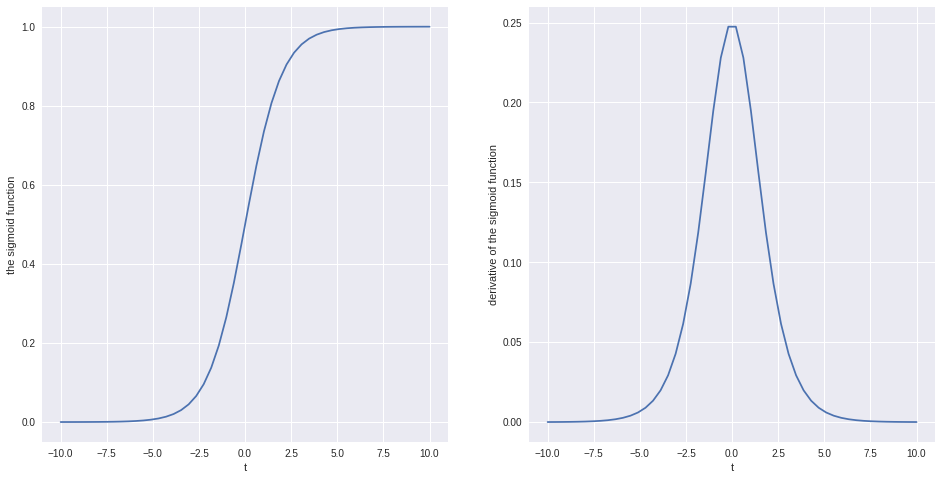

In [0]:
t = np.linspace(-10,10)
sigma = lambda t: 1./(1.+np.exp(-t))
dsigma = lambda t: sigma(t) * (1-sigma(t))

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.plot(t, sigma(t));
plt.xlabel('t');
plt.ylabel('the sigmoid function');

plt.subplot(122)
plt.plot(t, dsigma(t));
plt.xlabel('t');
plt.ylabel('derivative of the sigmoid function');

### Example

Let $\tanh(t) = \frac{\sinh(t)}{\cosh(t)} = \frac{e^t-e^{-t}}{e^t+e^{-t}}$. The function $\sigma(t)$ is another example of an *activation function* in ML literature, called the *hyperbolic tangent function*.

### Exercise

Please calculate the derivative of the hyperbolic tangent function $\tanh(t)$ and verify that $\tanh'(t) = 1-\tanh^2(t).$ 



In [0]:
# PLEASE ENTER PYTHON CODE TO PLOT THE HYPERBOLIC TANGENT FUNCTION AND ITS DERIVATIVE.

### Some properties of the hyperbolic tangent function

1. $\lim_{t \to - \infty} \tanh(t)=$____.
2. $\lim_{t \to \infty} \tanh(t)=$____.
3. At $t=0$, the value of the function $\tanh(0)=$____.
4. The derivative $\tanh'(t)$ is always  ____.
5. The function $\tanh(t)$ is always ____.

# Unconstrained Optimization

**Ref.** MML, Chapter 7, Continuous Optimization, Section 7.1 

**Problem.** What is the number $t$ closest to given numbers $x_1, x_2, x_3$?

**Solution.** Let $f(t)$ denote the sum of distances between the point $t$ and the points $x_1, x_2, x_3$. That is,

$$ f(x) = (t-x_1)^2+(t-x_2)^2+(t-x_3)^2.$$

**Analytic Approch.** Set $f'(t)=0$. Then $f'(t) = 2(x-x_1)+2(x-x_2)+2(x-x_3)=0.$

Solving for $t$, we find $$t=\frac{x_1+x_2+x_3}{3}.$$

**Question.** *Is this really a minimum? How can you check?*

**Computational approach.** 
1. Choose an initial randomly, $t_0$.
2. Let $t_{n+1} = t_n - h \cdot f'(t_n)$.
3. Stop when the produce converges, that is when the distance between $t_n$ and $t_{n+1}$ becomes smaller than a prescribed value, $\epsilon.$

Here, $h$ is called the *learning rate* or *step size*.

**Question.** *Did you really find a global minimum? How can you make sure?*


**Comments.** 

1. The answer for the above problem with $N$ points $x_1, x_2, \ldots, x_N$,
would be similarly, the (arithmetic) mean

\begin{equation}t=\frac{x_1+x_2+\cdots+x_N}{N}.\end{equation}

2. The function $f(t) = \sum_{i=1}^N (t-x_i)^2$ is called the **sum of squared errors**. It is an example of a **loss** (or, **empirical risk**) function in ML literature. 

Loss functions are chosen according to the nature of the ML task.

3. The function $f(t)$ is convex, that is the values of the function $f(t)$ always lie over the the tangen lines (spaces). Since it is convex, it has a global minimum, in this case the *arithmetic mean*.

4. In higher dimensions, the derivative $f'(t)$ is replaced by the gradient $\nabla f(\mathbf{t})$. For this reason, this method of computational minimization is called the *gradient descent algorithm*.

5. The gradient $\nabla f(\mathbf{t})$ is the direction in which $f(\mathbf{t})$ increases the most. The opposite direction $-\nabla f(\mathbf{t})$ is the direction in which $f(\mathbf{t})$ decreases the most.

In several dimensions, where the point $\mathbf{t}_{n+1} \in \mathbf{R}^D$ is calculated, the equation becomes:

$$ \mathbf{t}_{n+1} = \mathbf{t}_n - h \nabla f(\mathbf{t}).$$

## What could go wrong?

1. If the  *learning rate* is too high for the given function, we may bounce off the minimum.

2. Gradient Descent could be slow at times.

The Rosenbrock function shows these difficulties:

$$f(x_1, x_2) = (1-x_1)^2 + 100(x_2-x_1^2)^2.$$

There is a global minimum at $(1,1)$. Below graph from Wikipedia shows that Gradient Descent converges rather slowly towards to the global minimum.

[Link to Rosenbrock function 3D Graph](https://en.wikipedia.org/wiki/File:Rosenbrock_function.svg)

### Gradient Descent for Rosenbrock Function

![Gradient Descent for Rosenbrock function](https://upload.wikimedia.org/wikipedia/commons/thumb/6/60/Banana-SteepDesc.gif/600px-Banana-SteepDesc.gif)

In [0]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://en.wikipedia.org/wiki/Gradient_descent#/media/File:Gradient_descent.svg")

## Gradient Descent

https://scipython.com/blog/visualizing-the-gradient-descent-method/

## Animated

https://github.com/Shathra/gradient-descent-demonstration



# Probability Theory

**Ref.** MML, Chapter 6, Probability and Distributions, Section 6.1-6.4 

## The sample Space $\Omega$

The *sample space* $\Omega$ is the set of all possible outcomes of the experiment. The sample space for two successive toin cosses is $\Omega = \lbrace hh, ht, th, tt \rbrace$.

## The event space $\mathcal{A}$

The *event space* is the space of potential results of the experiment. 

## The probability $P$

With each event $A\in \mathcal{A}$, we associate a number $P(A)$ that measures the probability or degree of belief that the event $A$ will occur. The value $P(A)$ is called the *probability* of the event $A$.

First a warning: A random variable is neither random, nor a variable. In fact, it is a function from the sample space to real numbers, $\mathbf{R}$.

## Random Variable

A random variable $X$ is a function from the sample space $\Omega$ to the target space $\mathcal{T}$. For us, the target space $\mathcal{T}$ will typically be the set of real numbers $\mathbf{R}$. 

### Example

Let $X$ denote the number of heads in two consecutive coin tosses. Then $X$ is random variable on the sample space $\Omega = \lbrace hh, ht, th, tt \rbrace$:

$$X(hh)=2$$
$$X(ht)=1$$
$$X(th)=1$$
$$X(tt)=0$$

For a finite sample space $\Omega$, a random variable is a *lookup table*.

For any subset $S\subset \mathbf{R}$, we associate a probability $P_X(S)$:

$$ P_X(S) = P(X\in S) = P(\lbrace \omega \in \Omega: X(\omega) \in S \rbrace).$$

The function $P_X$ is the *law* or the *distribution* of the random variable $X$.




## Discrete Probability

When the target space $\mathcal{T}$ is finite or discrete, the random variable $X$ is called *discrete random variable*.

The function $x \to P(X=x)$ is called the *probability mass function*. The function $x \to P(X\leq x)$ is called the *cumulative distribution function*.

### Example 
Let the sample space be $\Omega = \lbrace hh, ht, th, tt \rbrace$ and the random variable $X$ denote the number of heads in two consecutive coin tosses. The probability mass distribution function and the cumulative probability distribution are:


$$P(X=0) = \frac{1}{4}, P(X\leq 0) = \frac{1}{4}$$


$$P(X=1) = \frac{2}{4}, P(X\leq 1) = \frac{3}{4}$$

$$P(X=2) = \frac{1}{4}, P(X\leq 2) = \frac{4}{4}$$

## Bernoulli Trials

An experiment with a binary outcome (success/failure) is called a *Bernoulli trial*, where the probability of success is $p$ and the probability of failure is $1-p$ for some real number $p\in [0,1]$. A sequence of outcomes is called a *Bernoulli process*.

### Example 
Flipping a coin, or a web user clicking on a link a web page can be modeled as a *Bernoulli trial*, where success can be flipping heads or a user clicking on the said link.

## Binomial Distribution
The *binomial distribution* with the parameters $N$ and $p$ is the discrete probability distribution of the number of successes in a sequence of $N$ independent experiments, each with a binary outcome (success or failure), where $p$ is the probability of success. Recall that each such experiment is a *Bernoulli trial*. 

Let $X$ denote the corresponding random variable $X$. Then, the probability mass function is

$$P(X=x) = {N \choose p} p^x(1-p)^{(N-x)}.$$

Denoting the random variable corresponding to the $k$th experiment by $X_k$. We can also state that the random variable $X$ is a sum of random variables $X_k$, that is 

$$ X = X_1+X_2+\cdots+X_N.$$


### Example

Denote the probability $P(h)$ with $p$. Let $X$ denote the number of heads in $N$ consecutive coin tosses. In our working example, $N$ was $2$ and $p=0.5$. 

This is an example of a *binomial distribution* with parameters $N$ and $p$.



In [0]:
import numpy as np

N = 100 # number of trials p = 0.5 # fair coin

p = 0.5 # fair coin

# We are sampling from the binomial distribution:

X = np.random.binomial(N, p) # the number of heads in N trials where P(H) = p.

print(X)  

# We don't need to sample X once, we can sample many X's.

45


In [0]:


import numpy as np

N = 100 # number of trials p = 0.5 # fair coin

p = 0.5 # fair coin

# We are sampling from the binomial distribution:

Xs = np.random.binomial(N, p, size=10000) # the number of heads in N trials where P(H) = p.

In [0]:
Xs.shape

(10000,)

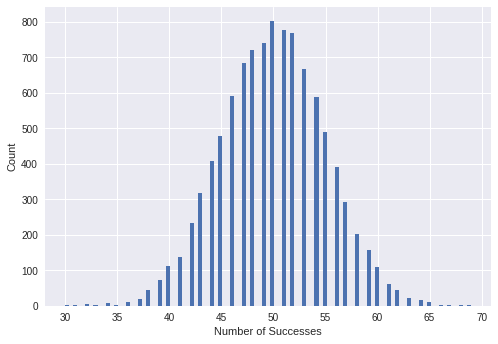

In [0]:
plt.hist(Xs, bins=101);
plt.ylabel('Count');
plt.xlabel('Number of Successes');

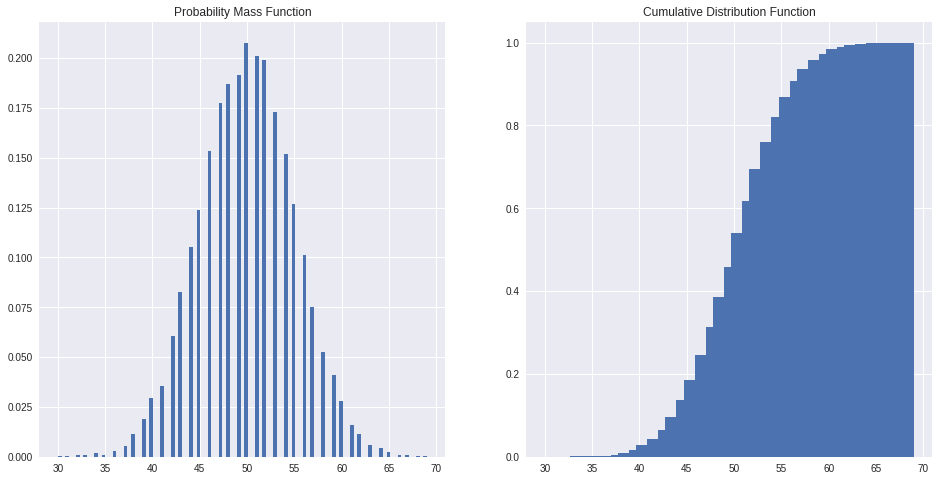

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

n, bins, patches = ax1.hist(Xs, bins=101, density=True)

ax1.set_title('Probability Mass Function')

n, bins, patches = ax2.hist(Xs, bins=101, cumulative=True, density=True)

ax2.set_title('Cumulative Distribution Function')

plt.show()



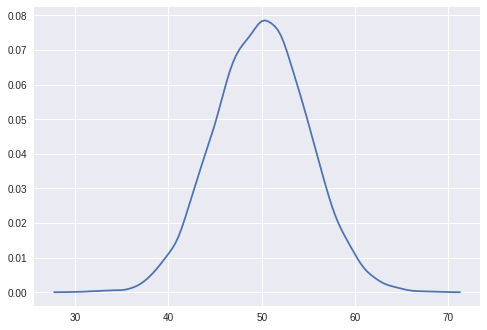

In [0]:
import seaborn as sns
sns.distplot(Xs, bins=101, hist=False);

## The Joint Probability

$$ P(X=x_i, Y=y_i) = \frac{n_{ij}}{N}$$

where $n_{ij}$ is the number of events with $x_i$ and $y_j$ and $N$ the total number of events.

For the probability of $X=x$ and $Y=y$, we also write $p(x,y)$.

## Marginal Probability

The *marginal probability* of $x$ is the sum of all probabilities $p(x, y_j)$:

$$ p(x) = \sum_j p(x, y_j).$$

## Conditional Probability

The *conditional probability* of $y$ given $x$ has happened is denoted by $p(y|x)$:

$$ p(y|x) = \frac{p(x,y)}{p(x)}.$$

## Independence

Two events are independent if the occurence of one does not afect the probability of occurence of the other.

In other words, $p(x,y) = p(x)p(y)$ for all $x$ and $y$, the corresponding random variables $X$ and $Y$ are independent.

Said differently, if $p(y|x)=p(y)$ for all values of $x$ and $y$, the corresponding random variables $X$ and $Y$ are independent.

## Continuous Probability

Continuous random variables do not have **probability mass functions**.

Instead, they have **probability density functions** which measure the probability of an interval.

### Probability Density Function

A function $f: \mathbf{R}^D \to \mathbf{R}$ is called a *probability density function* (pdf) if

1. The function $f(\mathbf{x})$ is non-negative.
2. Its integral exists and 
$$\int_{\mathbf{R}^D} f(\mathbf{x})d\mathbf{x}=1.$$

### Associated Random Variable
When $D=1$,

$$ P(a\leq X \leq b) = \int_a^b f(x) dx.$$

For $D>1$, we can define $X$ similarly.

The above association is called the *law* or *distribution* of the random variable $X$.

### Cumulative Distribution Function

A cumulative distribution function (cdf) for a 1-dimensional random variable $X$ is

$$F_X(x) = P(X\leq x)$$

It is equal to

$$F_X(x) = \int_{-\infty}^x f(z) dz.$$

### Uniform Distribution on a finite interval 

Let $I=[0,1]$. Define $f(x)=2x$ when $x\in I$ and $0$ otherwise.

Verify that $f(x)$ is a probability distribution function.

### Any function $g(x)$ with a finite integral on $\mathbf{R}$

Any function $g(x)$ with a finite integral on $\mathbf{R}$ produces a probability distribution function, $f(x)$. Denote the integral of $g(x)$ by $A$. Then, $f(x) = \frac{g(x)}{A}$ is probability distribution function.

For instance, let $g(x) = e^{-x^2}$. The integral of $g(x)$ is $\sqrt \pi$. So,
$$ f(x) = \frac{1}{\sqrt\pi}e^{-x^2}$$
is probability distribution function.

This is the famous *normal* or *Gaussian* distribution.

### Sum Rule or Marginalization

$$p(x_1) = \int p(x_1, x_2) d x_2.$$

### Product Rule

$$p(x_1, x_2) = p(x_2|x_1)p(x).$$

## Bayes Rule
Bayes Rule states that

$$p(\mathbf{x} | \mathbf{y}) = \frac{p(\mathbf{y}|\mathbf{x})p(\mathbf{x})} {p(\mathbf{y})},$$

or
$$p(\mathbf{model} | \mathbf{data}) = \frac{p(\mathbf{data}|\mathbf{model})p(\mathbf{model})} {p(\mathbf{data})}.$$




## Expected Value

The *expected value* of a function $g(x)$ of a univariate random variable $X \sim p(x)$ is 

$$\mathbb{E}_X[g(x)] = \int g(x) p(x)dx.$$

## Mean

The *mean* of a random variable $X$ is the expected value of the identity function:

$$ \mu = \mathbb{E}_X[x] = \int x p(x) dx.$$

## Median

The *median* is the middle value separating the upper half from the lower half of a dataset.

## Mode

The *mode* is the most frequently obtained value of a dataset.

## Covariance

The *covariance* between two univariate random variables $X,Y\in \mathbf{R}$ is 

$$\mathrm{Cov}_{X,Y}[x,y] = \mathbb{E}_{X,Y}[(x-\mathbb{E}_X[x])(y-\mathbb{E}_Y[y])].$$

This simplifies to

$$\mathrm{Cov}[x,y] = \mathbb{E}[xy] - \mathbb{E}[x]\mathbb{E}[y].$$

## Variance

Self-covariance of a variable $\mathrm{Cov}[x,x]$ is called the *variance* and denoted by $\mathbb{V}_X[x]$.
Its square root is called the *standard deviation*, denoted by $\sigma(x)$.

## Empirical Mean

$$\overline{\mathbf{x}} = \frac{1}{N} \sum_{n=1}^N \mathbf{x}_n.$$

## Empirical Covariance

$$\Sigma = \frac{1}{N} \sum_{n=1}^N (\mathbf{x}_n-\overline{\mathbf{x}})(\mathbf{x}_n-\overline{\mathbf{x}})^T.$$

## Variance again

1. $\mathbb{V}_X[x] = \mathbb{E}_X[(x-\mu)^2].$

2. $\mathbb{V}_X[x] = \mathbb{E}_X[x^2]-(\mathbb{E}_X[x])^2.$

3. $\mathbb{V}_X[x] =  \frac{1}{2}\cdot\frac{1}{N^2} \sum_{i,j=1}^N (x_i-x_j)^2.$

*Suggested Exercise.* Prove the latter two equalities using the definition of the variance.